### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.model_selection as sms
import sklearn.preprocessing as sp
import sklearn.linear_model as slm
import sklearn.metrics as sm
import sklearn.ensemble as ens
from warnings import filterwarnings 
filterwarnings('ignore') # to ignore warnings
import sklearn.linear_model as slm
import sklearn.svm as svm

### Loading data

In [2]:
# retrieving data
#df=pd.read_csv("D:\\Data\Gamboo\Body_fat\Body fat\surveyofbodyfat.csv")
df=pd.read_csv("surveyofbodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### EDA, Preprocessing

To check the general form of columns which may need some **cleaning operations like handling null(missing values), converting datatype, and others**.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [4]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


There are some unwanted data with **impossible characteristics of the human body**, so in the data normalization process we will **deactivate** these outliers

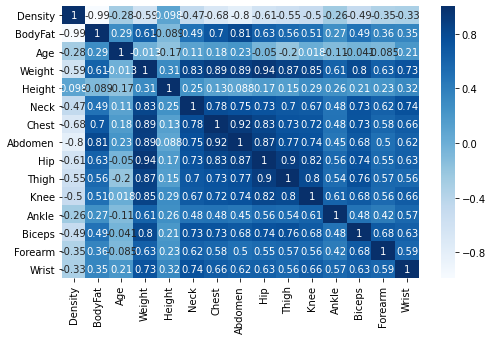

In [5]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

As can be seen in the heatmap, **"Density"** has an almost perfect correlation with **"BodyFat"**, because it is one of *BodyFat* **indicators** after real fat calculation. Hence, it should be dropped

#### Splitting data

In [6]:
X = df.drop(columns=['Density', 'BodyFat'])
y = df[['BodyFat']]

In [7]:
train_X, test_X, train_y, test_y = sms.train_test_split(X, y, test_size=0.25, random_state=25)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(189, 13) (63, 13) (189, 1) (63, 1)


#### Data Normalization(Scaling)

**RobustScaler** is one of the preferred scalers mainly to **avoid outliers impact** if there is a chance of being

In [8]:
scaler_rb=sp.RobustScaler()
scaled_tra=scaler_rb.fit_transform(train_X)

In [9]:
names = list(train_X.columns)
train_X=pd.DataFrame(scaled_tra, columns=names)
train_X.head(3)

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,-0.235294,1.4625,1.1250,1.50000,0.891892,0.937063,1.247059,1.575758,1.43750,1.722222,1.543478,1.407407,1.142857
1,0.823529,-0.7125,-1.0625,-0.87500,0.000000,-0.328671,-1.082353,-0.924242,-1.09375,-0.777778,-0.065217,-0.518519,-1.000000
2,0.235294,-0.4125,0.1875,-1.09375,-0.603604,-0.468531,-0.623529,-0.469697,-0.09375,-0.055556,-0.652174,-0.925926,-0.500000


In [10]:
scaled_test=scaler_rb.transform(test_X)
test_X=pd.DataFrame(data=scaled_test, columns=names)
test_X.head(3)

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,-0.941176,-0.48750,-0.6875,-0.03125,-0.504505,-0.202797,-0.482353,-0.348485,-0.34375,0.055556,-0.304348,-0.148148,-0.285714
1,0.000000,0.05000,0.0625,-0.06250,0.279279,-0.132867,-0.011765,0.166667,0.21875,0.611111,-0.065217,-0.111111,0.214286
2,0.647059,-0.61875,0.1875,-0.75000,-0.864865,-0.503497,-0.635294,-0.621212,-0.75000,-0.555556,-0.521739,-0.481481,-0.642857


In [11]:
# to merge all scores and metrics results altogether
performance=pd.DataFrame(data=None, index=['MAE','RMSE','R2_score'])
performance

""
MAE
RMSE
R2_score


In [12]:
# creating function to evaluate model at one run
def evaluate(model,model_name):
    performance[model_name]=[sm.mean_absolute_error(test_y, model.predict(test_X)),
    sm.mean_squared_error(test_y, model.predict(test_X))**0.5,
    sm.r2_score(test_y, model.predict(test_X)) ]
pd.options.display.float_format = '{:.3f}'.format

### Modelling

#### Multiple linear regression model

In [13]:
lm=slm.LinearRegression()
lm.fit(train_X, train_y)
evaluate(lm, 'MLinear')
performance[['MLinear']]

,MLinear
MAE,4.226
RMSE,5.057
R2_score,0.601


#### Lasso regression model

In [14]:
# Return numbers spaced evenly on a log scale, it means that creates 50 numbers between 1 and 5
np.logspace(start=1, stop=5, num=50)

array([1.00000000e+01, 1.20679264e+01, 1.45634848e+01, 1.75751062e+01,
       2.12095089e+01, 2.55954792e+01, 3.08884360e+01, 3.72759372e+01,
       4.49843267e+01, 5.42867544e+01, 6.55128557e+01, 7.90604321e+01,
       9.54095476e+01, 1.15139540e+02, 1.38949549e+02, 1.67683294e+02,
       2.02358965e+02, 2.44205309e+02, 2.94705170e+02, 3.55648031e+02,
       4.29193426e+02, 5.17947468e+02, 6.25055193e+02, 7.54312006e+02,
       9.10298178e+02, 1.09854114e+03, 1.32571137e+03, 1.59985872e+03,
       1.93069773e+03, 2.32995181e+03, 2.81176870e+03, 3.39322177e+03,
       4.09491506e+03, 4.94171336e+03, 5.96362332e+03, 7.19685673e+03,
       8.68511374e+03, 1.04811313e+04, 1.26485522e+04, 1.52641797e+04,
       1.84206997e+04, 2.22299648e+04, 2.68269580e+04, 3.23745754e+04,
       3.90693994e+04, 4.71486636e+04, 5.68986603e+04, 6.86648845e+04,
       8.28642773e+04, 1.00000000e+05])

In [15]:
lasso=slm.LassoCV(alphas=np.logspace(start=1, stop=5, num=50),cv=5)
out_lasso = lasso.fit(train_X, train_y)
out_lasso.alpha_

100000.0

In [16]:
evaluate(out_lasso, 'Lasso')
performance[['Lasso']]

,Lasso
MAE,6.724
RMSE,8.041
R2_score,-0.008


#### Ridge regression model

In [17]:
ridge=slm.RidgeCV(alphas=np.logspace(start=1, stop=5, num=50),cv=5)
out_ridge=ridge.fit(train_X, train_y)
ridge.alpha_

10.0

In [18]:
evaluate(out_ridge, 'Ridge')
performance[['Ridge']]

,Ridge
MAE,4.232
RMSE,5.020
R2_score,0.607


#### ElasticNet regression model

In [19]:
elastic_net=slm.ElasticNetCV(l1_ratio=0.45,alphas=np.logspace(start=1, stop=5, num=50),cv=5)
out_elastic_net=elastic_net.fit(train_X, train_y)

In [20]:
print(out_elastic_net.alpha_)
out_elastic_net.coef_

10.0


array([ 0.        ,  0.        , -0.        ,  0.        ,  0.02661057,
        0.125869  ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [21]:
evaluate(out_elastic_net, 'Elastic_Net')
performance[['Elastic_Net']]

,Elastic_Net
MAE,6.654
RMSE,7.957
R2_score,0.013


#### SVR regression model

We will do **Hyperparameter tuning** to find **otimal best** parameters in some models

In [22]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[1, 5, 10, 50, 100, 500, 1000] }
svr = svm.SVR()
clf = sms.GridSearchCV(svr, parameters)
clf.fit(train_X, train_y)
clf.best_params_

{'C': 50, 'kernel': 'linear'}

In [23]:
evaluate(clf,'SVR')
performance[['SVR']]

,SVR
MAE,4.453
RMSE,5.252
R2_score,0.570


### Ensemble methods

#### RandomForest regression model

In [24]:
parameters = { 'n_estimators':[i for i in range(150,200,10)] }
rfr = ens.RandomForestRegressor(random_state=25)
clf3 = sms.GridSearchCV(rfr, parameters)
clf3.fit(train_X, train_y)

clf3.best_params_

{'n_estimators': 160}

In [25]:
evaluate(clf3, 'R_forest')
performance[['R_forest']]

,R_forest
MAE,4.632
RMSE,5.372
R2_score,0.550


##### ExtraTree regression model

In [26]:
parameters = { 'n_estimators':[i for i in range(80,200,10)] }
etr = ens.ExtraTreesRegressor(random_state=25)
clf4 = sms.GridSearchCV(etr, parameters)
clf4.fit(train_X, train_y)

clf4.best_params_

{'n_estimators': 150}

In [27]:
evaluate(clf4, 'ExTree')
performance[['ExTree']]

,ExTree
MAE,4.298
RMSE,5.085
R2_score,0.597


#### GradientBoosting regression model

In [28]:
parameters = { 'learning_rate':[0.1,0.01,0.001], 'n_estimators':[50,100,150,200,250] }
gbr = ens.GradientBoostingRegressor(random_state=25)
clf5 = sms.GridSearchCV(gbr, parameters)
clf5.fit(train_X, train_y)

clf5.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [29]:
evaluate(clf5, 'GradientBR')
performance[['GradientBR']]

,GradientBR
MAE,4.483
RMSE,5.357
R2_score,0.553


#### AdaBoost regression model

In [30]:
parameters = { 'learning_rate':[0.1, 1, 2], 'n_estimators':[50,100,150,200]}
abr = ens.AdaBoostRegressor(random_state=25)
clf6 = sms.GridSearchCV(abr, parameters)
clf6.fit(train_X, train_y)

clf6.best_params_

{'learning_rate': 2, 'n_estimators': 150}

In [31]:
evaluate(clf6, 'AdaBR')
performance[['AdaBR']]

,AdaBR
MAE,4.412
RMSE,5.173
R2_score,0.583


#### Voting regression model

In [32]:
performance

,MLinear,Lasso,Ridge,Elastic_Net,SVR,R_forest,ExTree,GradientBR,AdaBR
MAE,4.226,6.724,4.232,6.654,4.453,4.632,4.298,4.483,4.412
RMSE,5.057,8.041,5.020,7.957,5.252,5.372,5.085,5.357,5.173
R2_score,0.601,-0.008,0.607,0.013,0.570,0.550,0.597,0.553,0.583


In [33]:
# estimators for Voting model are prefitted models those were evaluated before
vr = ens.VotingRegressor([('MLinear', lm), ('ExtraTree', clf4), ('Ridge', out_ridge)])
vr.fit(train_X, train_y)

evaluate(vr, 'VotingR')
performance

,MLinear,Lasso,Ridge,Elastic_Net,SVR,R_forest,ExTree,GradientBR,AdaBR,VotingR
MAE,4.226,6.724,4.232,6.654,4.453,4.632,4.298,4.483,4.412,4.130
RMSE,5.057,8.041,5.020,7.957,5.252,5.372,5.085,5.357,5.173,4.918
R2_score,0.601,-0.008,0.607,0.013,0.570,0.550,0.597,0.553,0.583,0.623


I merged evaluation metrics and scores of all models we trained into **"performance"** in order to make the comparison. So, 
that can be seen some models performed better like **MultiLinear, Ridge, ExtraTree, Voting regression** models.
Particularly, doing of **hyperparameter tuning** boosted performance on closer optimal values

According to the comparison of models performances, the **Voting regression** is the optimal(best for now) model to pick and to utilize as the major

**Thanks**